In this project,we use a dataset which utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


# In the project we are going to predict the wins considerng the factors given in the dataset

In [82]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
#reading a dataset
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


with the above observation of dataset,our target variable is 'W' and we are going to predict wins considering the features likeRuns, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors.

In [84]:
#to check how many rows and columns in dataframe
df.shape

(30, 17)

In [85]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


with above details,we can observe all the datatypes of each column along with memory consumption of dataset

In [86]:
#to get statistics information
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


with above information,we can see there no missing values in any column and we can also observe the fact that CG column contains a minimum value of even 0 value,which means the value can even go with zero amount as well.

In [87]:
#to check all the values count in dependent variable 'wins(W)'
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

It looks like the values appear to be a different for most of the records

In [88]:
#to check whether any null values present in dataframe
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [89]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Visualization

Text(0.5, 1.0, 'histogram of wins')

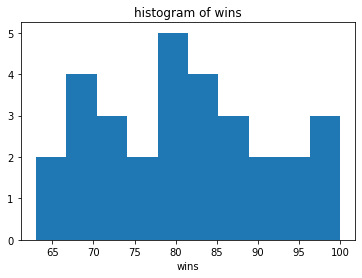

In [90]:
#visualize the histogram of wins
plt.hist(df['W'])
plt.xlabel('wins')
plt.title('histogram of wins')

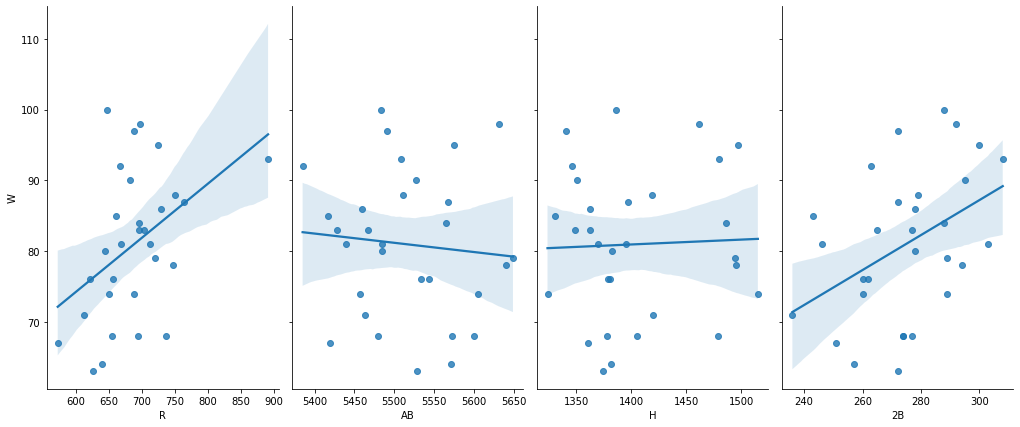

In [91]:
#Using a pairlot with regression method

sns.pairplot(df, x_vars=['R', 'AB','H','2B'], y_vars='W', height=6, aspect=0.6, kind='reg')

with above observation,columns like Runs(R) and Doubles(2B) are linearly increasing(Positively) with target variable 'W'.
wheras 'AB' and 'H' columns are not linear with target variable

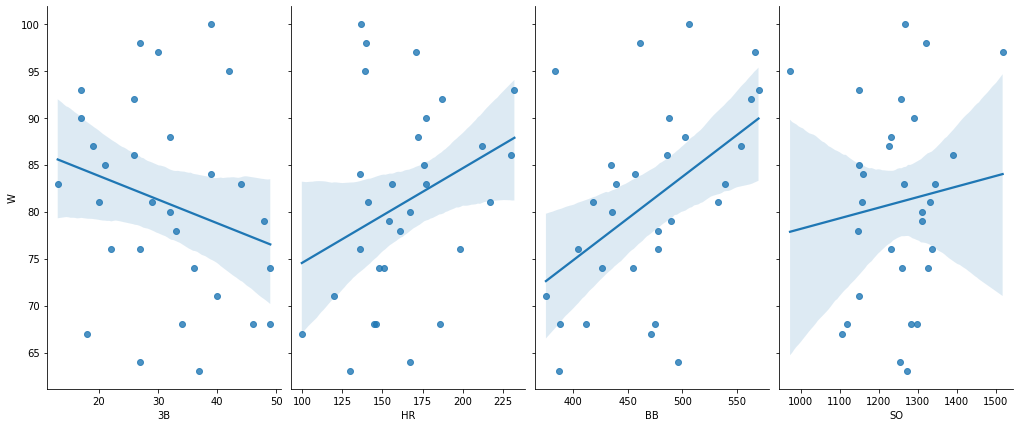

In [92]:
sns.pairplot(df, x_vars=['3B', 'HR','BB','SO'], y_vars='W', height=6, aspect=0.6, kind='reg')

with above observation,columns like "HR" and "BB" are linearly increasing(Positively) with target variable 'W'.
also "SO" also has slight linear relationship with 'W' and 
column "3B" is linearly decreasing(Negatively) with 'W'.

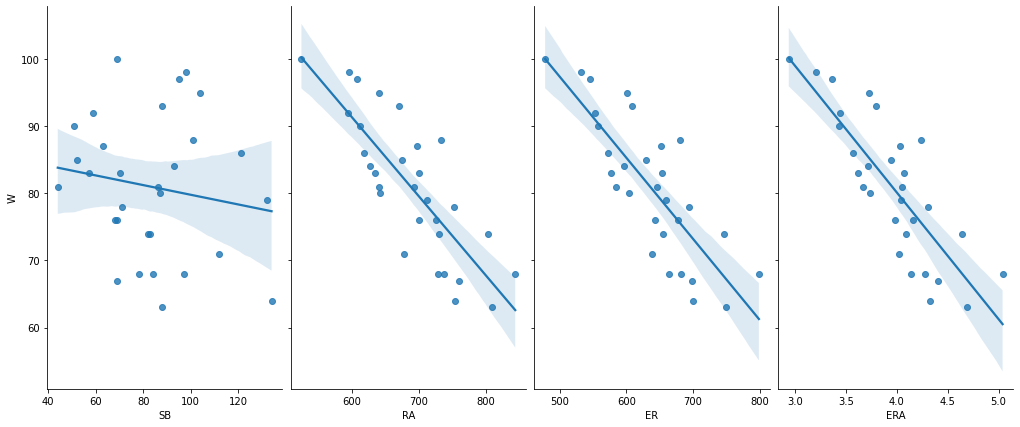

In [93]:
sns.pairplot(df, x_vars=['SB', 'RA','ER','ERA'], y_vars='W', height=6, aspect=0.6, kind='reg')

with above observation,columns like "RA","ER" and "ERA" are linearly decreasing(Positively) with target variable 'W'.
wheras "SB" column has a slight negative linearity with "W".

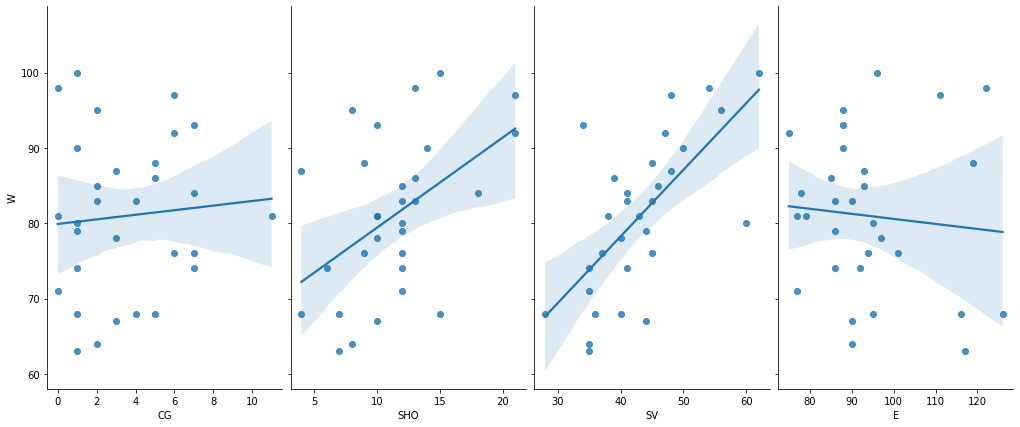

In [94]:
sns.pairplot(df, x_vars=['CG', 'SHO','SV','E'], y_vars='W', height=6, aspect=0.6, kind='reg')

with above observation,columns like "SHO" and "SV" are linearly increasing(Positively) with target variable 'W'.
"CG" has slight positive linearity and "E" ahs slight negative linearty with "W".

#### In conclusion:
#### columns like "CG", "E", "SB", "SO", "H" and "AB" have least(slight)
#### linearity with dependent variable(W)

# Ploting a Normal Distribution Curve

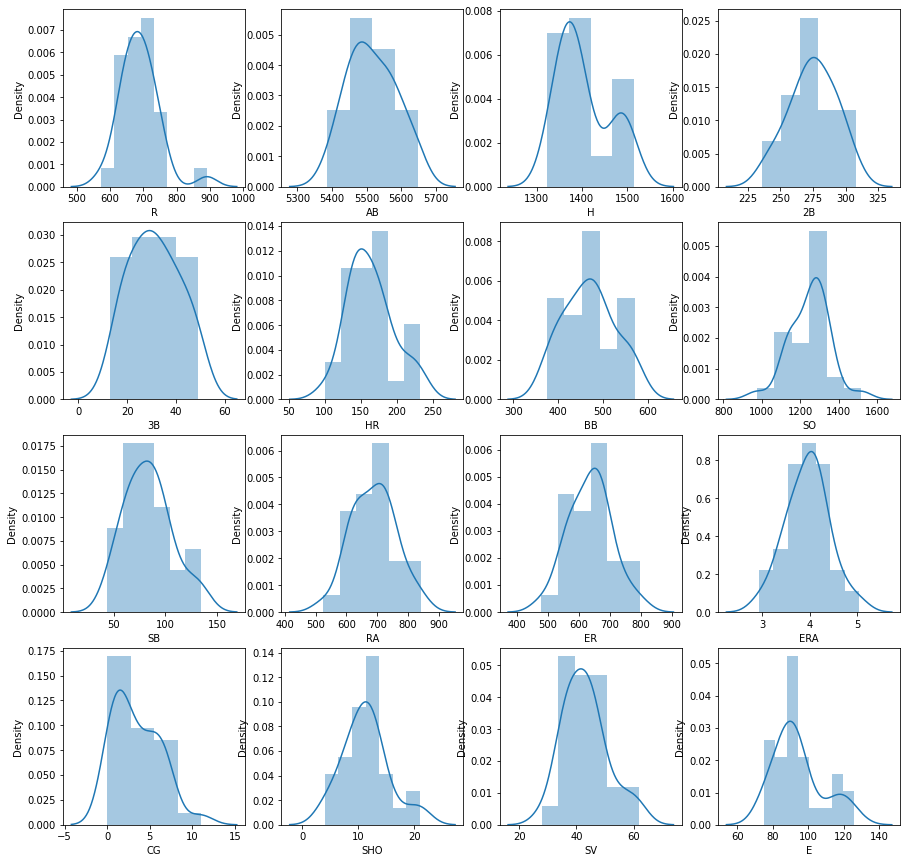

In [95]:
import warnings
warnings.filterwarnings('ignore') # to remove warning messages

fig, axs = plt.subplots(nrows=4,ncols=4)   #alloting no.of subplots in row and column wise
fig.set_size_inches(15, 15)

sns.distplot(df.R, ax=axs[0,0])   
sns.distplot(df.AB, ax=axs[0,1])
sns.distplot(df.H, ax=axs[0,2])
sns.distplot(df['2B'], ax=axs[0,3])
sns.distplot(df['3B'], ax=axs[1,0])   
sns.distplot(df.HR, ax=axs[1,1])
sns.distplot(df.BB, ax=axs[1,2])
sns.distplot(df.SO, ax=axs[1,3])
sns.distplot(df.SB, ax=axs[2,0])   
sns.distplot(df.RA, ax=axs[2,1])
sns.distplot(df.ER, ax=axs[2,2])
sns.distplot(df.ERA, ax=axs[2,3])
sns.distplot(df.CG, ax=axs[3,0])   
sns.distplot(df.SHO, ax=axs[3,1])
sns.distplot(df.SV, ax=axs[3,2])
sns.distplot(df.E, ax=axs[3,3])

with the above evidence, the data present in each coumn is not normalized and building blocks are out of normalized curve for all columns.

# Correlation

In [96]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [97]:
#w.r.t "W"

df.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

As we seen it earlier in pairplot,here we can check with exact correlation values with "w"

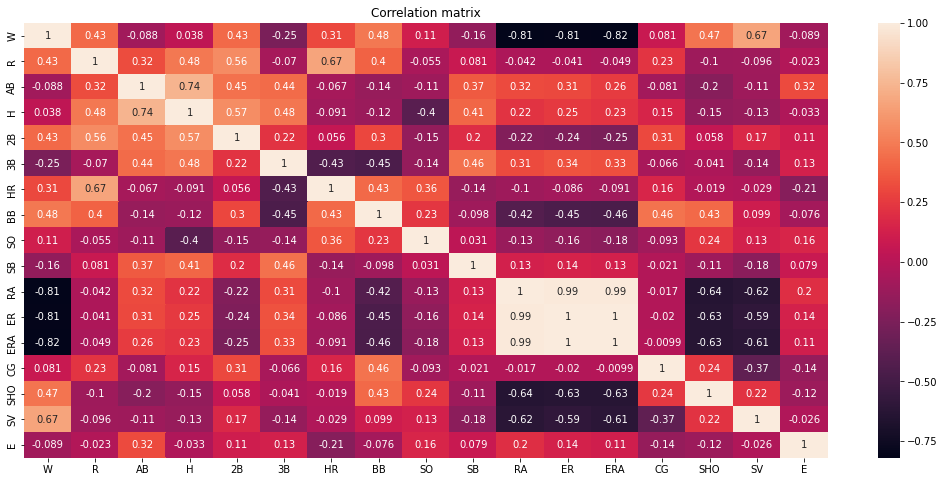

In [98]:
#plotting the correlation matrix using heatmap

corr_matrix = df.corr()
plt.figure(figsize=[18,8])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

#### With this,
#### 1) column "H" has least positive correlation(3.8%) with "W".
#### 2) column "SV" has highest positive correlation(67%) with "W".
#### 1) column "AB" has least positive correlation(8.8%) with "W".
#### 2) column "ERA" has highest negative correlation(82%) with "W".

# Checking with outliers

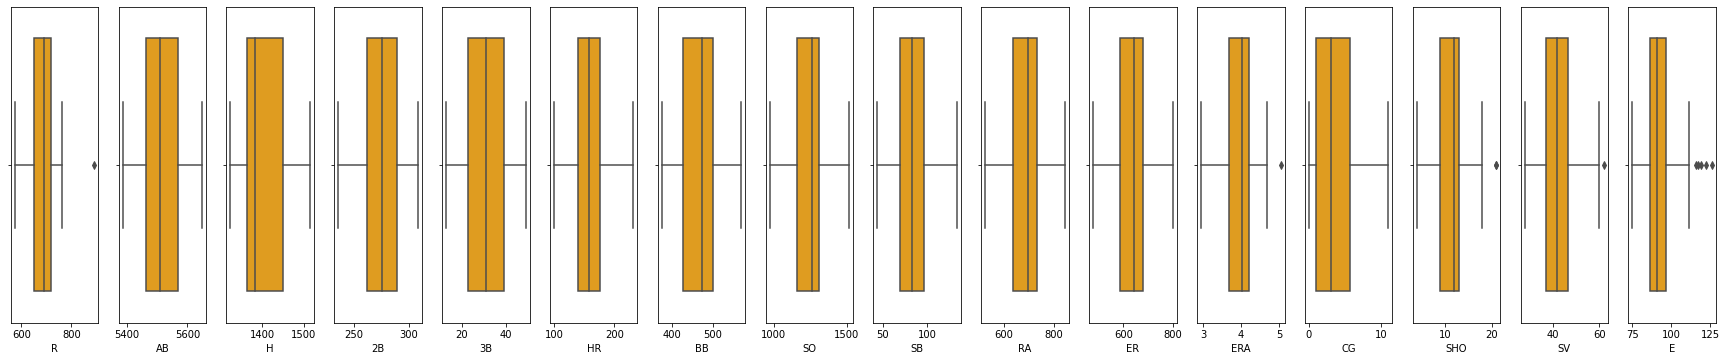

In [99]:
df_new = df.drop(["W"],axis=1)
column_list = df_new.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (1.5*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df_new[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

with this,we can say that there are no outliers in most of cloumns except for "E".

## checking with Skewness

In [100]:
df.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

So,column "R" has having Skewness of about 1.2 is highest in dataset

## Data cleaning

In [101]:
#Since by doing all the analysis on each column,we dont have enough evidence to remove/drop any values/cloumn from dataframe
#All columns are equally important for determining the total sales

## Removing the outliers

In [102]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(30, 17)

In [103]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(30, 17)
(29, 17)
1


### calcuating the percentage of data loss

In [104]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:3.33%


there is a 3.33% data loss which is good to proceed for further

## Dividing the data into features and vectors

In [105]:
y = df_new[["W"]]
x = df_new.drop(["W"],axis=1)

## Checking with multicollinearity

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [145]:
calc_vif_value(x)

,variables,VIF
0,R,1684.071804
1,AB,4386.435411
2,H,4542.383497
3,2B,874.293076
4,3B,35.695117
5,HR,267.423009
6,BB,260.583556
7,SO,399.764153
8,SB,28.928494
9,RA,17975.314054


looks like,there is a high multicollinearity within the independent variables

## Fixing the Multicollinearity

In [146]:
x["ER_ERA"] = df.apply(lambda x_1: x_1['ER'] - x_1['ERA'],axis=1)
x["RA_H"] = df.apply(lambda x_1: x_1['RA'] - x_1['H'],axis=1)
x["AB_R"] = df.apply(lambda x_1: x_1['AB'] - x_1['R'],axis=1)

In [147]:
x = x.drop(["ER","ERA"],axis=1)
x = x.drop(["RA",'H'],axis=1)
x = x.drop(["AB",'R'],axis=1)

In [148]:
calc_vif_value(x)

,variables,VIF
0,2B,731.887060
1,3B,32.098753
2,HR,65.690227
3,BB,188.525769
4,SO,327.734620
5,SB,24.602599
6,CG,5.244118
7,SHO,26.462631
8,SV,82.347475
9,E,64.263855


So,compared to previous VIF values,these values are looking good,
By this we can say that multicollinearty has been removed comparatively.

## Transforming data to eliminate skewness

In [149]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[ 1.68518793,  1.00615029, -0.741927  , -1.60519802, -2.55061247,
         0.93613165, -0.3070982 , -0.78700219,  1.53275292, -0.34826526,
        -0.5080364 , -1.67584528,  0.2006046 ],
       [ 0.1381979 ,  1.18522654, -0.10995842, -0.46209597,  0.09368329,
        -0.51637733, -0.3070982 ,  0.23673654,  0.31202019, -0.54081981,
         0.23575821,  0.77455828, -0.99777387],
       [ 1.9073855 , -0.22881939, -0.66435412,  1.23209786, -0.93561146,
         0.22503836,  2.01131531, -0.25284418, -0.66413674, -1.32612477,
        -0.75292076, -0.60326022, -1.01190705],
       [-0.83766477, -0.43222791, -0.86003934, -1.16272085, -0.23068271,
        -0.61842153,  1.26446344, -0.51355493, -0.82068886,  0.65081835,
         0.09341386,  0.33929653,  1.19233544],
       [ 0.91143479,  1.62263592, -0.28964668, -0.15568583,  0.04414333,
         0.09503777,  1.26446344,  0.23673654, -1.14916472, -0.54081981,
         1.55623302, -0.08059296,  1.27878864]])

In [150]:
from sklearn.preprocessing import power_transform
y = power_transform(y)
y[:5]

array([[ 1.3820789 ],
       [ 0.27509881],
       [ 0.08151992],
       [-0.41521138],
       [-0.61933647]])

In [151]:
x_n1 = pd.DataFrame(x)
x_n1.skew()

0    -0.052793
1    -0.075139
2     0.000448
3    -0.008572
4     0.051530
5    -0.009570
6    -0.045947
7     0.000529
8    -0.000925
9     0.065585
10   -0.005014
11   -0.008926
12   -0.041423
dtype: float64

So,by doing this a lot of skewness has beem removed from all the available columns

## Selecting a best random state

In [152]:
#importing a necessary libraries
from sklearn.linear_model import BayesianRidge 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Evaluating model performance
# Now data is preprocessed and we can go for selecting best random state
Max_score = 0
maxRS = 0 #best random state value for max r2_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  Bay = BayesianRidge()
  Bay.fit(x_train,y_train)
  predic = Bay.predict(x_test)
  acc = r2_score(y_test,predic)
  if acc > Max_score:
    Max_score = acc
    maxRS = i
print("Best R2_score is ",Max_score," on Random state ",maxRS)

Best R2_score is  0.9863729145233291  on Random state  141


In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =.20,random_state=141)

In [154]:
print(x_train.shape,y_train.shape)

(23, 13) (23, 1)


In [155]:
print(x_test.shape,y_test.shape)

(6, 13) (6, 1)


In [156]:
#importing metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [204]:
#to predict the wins we can consider Linearregression model

from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_1)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_1)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_1,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_1)))

r2_score is 0.909
mse is 0.118
rmse is 0.343
mae is 0.284


In [199]:
#using BayesianRidge model 
from sklearn.linear_model import BayesianRidge 
Bay = BayesianRidge()
Bay.fit(x_train,y_train)
predic_2 = Bay.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_2)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_2)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_2,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_2)))

r2_score is 0.986
mse is 0.018
rmse is 0.133
mae is 0.122


In [200]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
predic_3 = RF.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_3)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_3)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_3,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_3)))

r2_score is 0.789
mse is 0.273
rmse is 0.523
mae is 0.460


In [201]:
#using Decisiontree regressor
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
predic_4 = DT.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_4)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_4)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_4,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_4)))

r2_score is 0.379
mse is 0.805
rmse is 0.897
mae is 0.827


It looks all models giving different results.So,Now lets go for Cross Validation to check with overfitting.

## Cross Validation to check with overfitting.

In [205]:
from sklearn.model_selection import cross_val_score

#for LinearRegression model
L_cr = cross_val_score(LR,x,y,cv=5)
print("cross validation for Linear regression model : ",L_cr.mean())
print("diff between r2_score and cv",(r2_score(y_test,predic_1)-L_cr.mean()))  #Best model can be considered by findng the least difference between r2_score and cv_score

cross validation for Linear regression model :  0.16263229373102378
diff between r2_score and cv 0.746430828715668


In [206]:
L_cr = cross_val_score(Bay,x,y,cv=5)
print("cross validation for BayesianRidge model : ",L_cr.mean())
print("diff between r2_score and cv",(r2_score(y_test,predic_2)-L_cr.mean()))

cross validation for BayesianRidge model :  0.22898610928105842
diff between r2_score and cv 0.7573868052422706


In [207]:
L_cr = cross_val_score(RF,x,y,cv=5)
print("cross validation for RF model : ",L_cr.mean())
print("diff between r2_score and cv",(r2_score(y_test,predic_3)-L_cr.mean()))

cross validation for RF model :  -0.5617971276669914
diff between r2_score and cv 1.3509861271241683


In [208]:
L_cr = cross_val_score(DT,x,y,cv=5)
print("cross validation for DecisionTreeRegressor model : ",L_cr.mean())
print("diff between r2_score and cv",(r2_score(y_test,predic_4) - L_cr.mean()))

cross validation for DecisionTreeRegressor model :  -2.024236935930913
diff between r2_score and cv 2.403222809502255


In conclusion,Linear regression model has least difference between r2_score and cv_score.
So,Im taking my final model as linear regression model

## Hyper parameter tuning

In [213]:
from sklearn.model_selection import GridSearchCV

params_list = {'fit_intercept':[False,True],
               'normalize':[True,False],
               'n_jobs' :[3,4,5],
               'positive':[True,False]
              }
GCV = GridSearchCV(LinearRegression(),params_list,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'fit_intercept': False, 'n_jobs': 3, 'normalize': True, 'positive': True}

In [216]:
#now predicting with best parameters

GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the r2_score
r2_score(y_test,GCV_predic)

0.8957104806405948

In [217]:
import joblib
joblib.dump(GCV.best_estimator_,"Baseball_Case_Study.pkl")

['Baseball_Case_Study.pkl']